<a href="https://colab.research.google.com/github/charujhagrawat20/StackIt/blob/main/Prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
def fuzzy_union_or(A,B,operator='max'):
  if len(A)!=len(B):
    raise ValueError("Fuzzy sets must have the same length (same universe of discourse).")
  if operator == 'max':
    return np.maximum(A,B)
  else:
    raise NotimplementedError(f"Operator '{operator}' not supported for Fuzzy union.")
def fuzzy_intersection_and(A,B,operator='min'):
  if len(A)!=len(B):
    raise ValueError("Fuzzy sets must have the same length (same universe of discourse).")
  if operator == 'min':
    return np.minimum(A,B)
  else:
    raise NotImplementedError(f"Operator '{operator}' not supported for Fuzzy intersection.")
def fuzzy_complement_not(A):
  return 1-A
U = np.array([1,2,3,4,5])
print(f"universe of Discourse (U): {U}\n")
A = np.array([1.0,0.8,0.4,0.1,0.0])
B = np.array([0.0,0.1,0.3,0.7,1.0])
print("--- Original Sets ---")
print(f"Fuzzy Set A: {A}")
print(f"Fuzzy Set B: {B}\n")
A_OR_B = fuzzy_union_or(A,B)
print("---Fuzzy UNION (A OR B)---")
print(f"Operation: max(mu_A(x),mu_B(x))")
print(f"Result(A OR B): {A_OR_B}\n")
A_AND_B = fuzzy_intersection_and(A,B)
print("---Fuzzy INTERSECTION (A AND B)---")
print(f"Operation: min(mu_A(x),mu_B(x))")
print(f"Result (A AND B): {A_AND_B}\n")
NOT_A = fuzzy_complement_not(A)
print("---Fuzzy COMPLEMENT (NOT A)---")
print(f"Operation: 1 - mu_A(x)")
print(f"Result (NOT A): {NOT_A}\n")
NOT_B = fuzzy_complement_not(B)
print("--Fuzzy COMPLEMENT (NOT B)---")
print(f"Operation: 1 - mu_B(x)")
print(f"Result (NOT B): {NOT_B}\n")

universe of Discourse (U): [1 2 3 4 5]

--- Original Sets ---
Fuzzy Set A: [1.  0.8 0.4 0.1 0. ]
Fuzzy Set B: [0.  0.1 0.3 0.7 1. ]

---Fuzzy UNION (A OR B)---
Operation: max(mu_A(x),mu_B(x))
Result(A OR B): [1.  0.8 0.4 0.7 1. ]

---Fuzzy INTERSECTION (A AND B)---
Operation: min(mu_A(x),mu_B(x))
Result (A AND B): [0.  0.1 0.3 0.1 0. ]

---Fuzzy COMPLEMENT (NOT A)---
Operation: 1 - mu_A(x)
Result (NOT A): [0.  0.2 0.6 0.9 1. ]

--Fuzzy COMPLEMENT (NOT B)---
Operation: 1 - mu_B(x)
Result (NOT B): [1.  0.9 0.7 0.3 0. ]



Service Rating: 6.5/10
Food Rating: 9.8/10
***Recommended Tip: 12.64%***


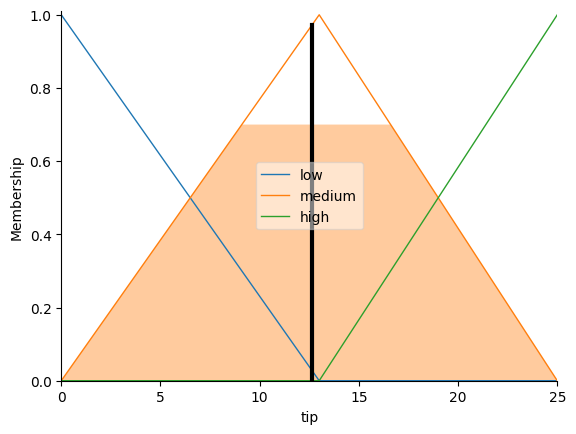


---Example 2: Poor Service/Bad Food---
Recommended Tip: 10.66%


In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
food = ctrl.Antecedent(np.arange(0,11,1), 'food')
tip = ctrl.Consequent(np.arange(0,26,1), 'tip')
service['poor'] = fuzzy.trimf(service.universe,[0,0,5])
service['acceptable'] = fuzzy.trimf(service.universe,[0,5,10])
service['excellent'] = fuzzy.trimf(service.universe,[5,10,10])
food['bad'] = fuzzy.trapmf(food.universe,[0,0,1,3])
food['decent'] = fuzzy.trimf(food.universe,[1,5,9])
food['great'] = fuzzy.trapmf(food.universe,[7,9,10,10])
tip['low'] = fuzzy.trimf(tip.universe,[0,0,13])
tip['medium'] = fuzzy.trimf(tip.universe,[0,13,25])
tip['high'] = fuzzy.trimf(tip.universe,[13,25,25])
rule1 = ctrl.Rule(service['poor']|food['bad'],tip['low'])
rule2 = ctrl.Rule(service['acceptable'],tip['medium'])
rule3 = ctrl.Rule(service['excellent'] & service['poor'],tip['high'])
rule4 = ctrl.Rule(food['decent'] & service['poor'],tip['medium'])
tip_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4])
tipping_simulation = ctrl.ControlSystemSimulation(tip_control)
tipping_simulation.input['service']=6.5
tipping_simulation.input['food']=9.8
tipping_simulation.compute()
tip_amount = tipping_simulation.output['tip']
print(f"Service Rating: 6.5/10")
print(f"Food Rating: 9.8/10")
print(f"***Recommended Tip: {tip_amount:.2f}%***")
tip.view(sim=tipping_simulation)
plt.show()
print("\n---Example 2: Poor Service/Bad Food---")
tipping_simulation.input['service']=2
tipping_simulation.input['food']=3
tipping_simulation.compute()
print(f"Recommended Tip: {tipping_simulation.output['tip']:.2f}%")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.0 MB/s eta 0:00:00
---Defuzzification Results---
Centroid(CoG): 11.4870
Bisector (BoA): 11.7074
Mean of Maximum (MoM): 6.7656
Smallest of Max (SoM): 5.0000
Largest of Max (LoM): 15.0000


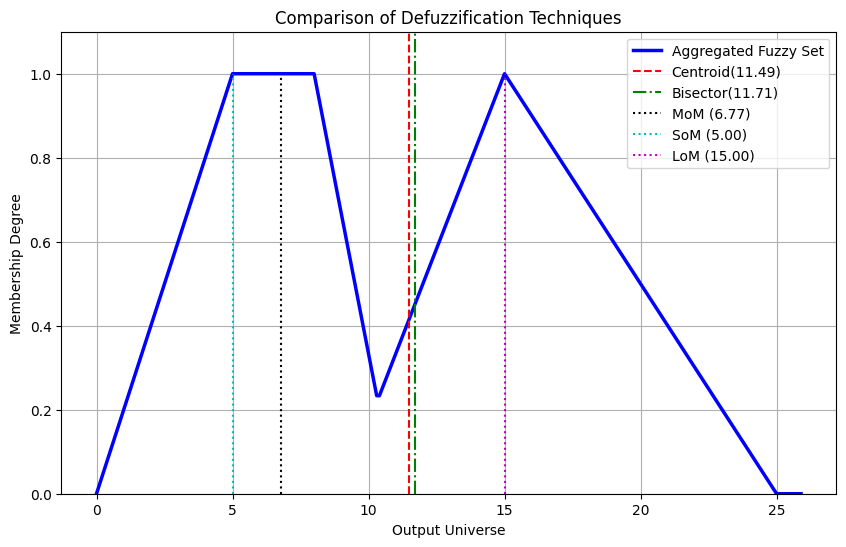

--- Training Perceptron (Epochs: 50, Rate: 0.1) ---
✅ Converged successfully at Epoch 10.

--- Training Complete ---
Final Weights: [0.13801492 0.09230627]
Final Bias: -0.2269

--- Testing Model Predictions ---
Input: [0 0], Predicted: 0, Expected: 0 (Correct)
Input: [0 1], Predicted: 0, Expected: 0 (Correct)
Input: [1 0], Predicted: 0, Expected: 0 (Correct)
Input: [1 1], Predicted: 1, Expected: 1 (Correct)


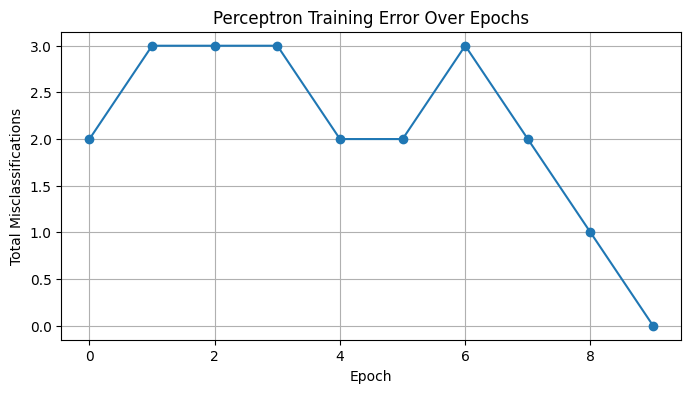

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def step_function(weighted_sum):
    return 1 if weighted_sum >= 0 else 0
class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.1, max_epochs=100):
        self.weights = np.random.uniform(low=-0.5, high=0.5, size=num_inputs)
        self.bias = np.random.uniform(low=-0.5, high=0.5, size=1)
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.errors = []
    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return step_function(weighted_sum)
    def train(self, training_inputs, labels):
        print(f"--- Training Perceptron (Epochs: {self.max_epochs}, Rate: {self.learning_rate}) ---")
        for epoch in range(self.max_epochs):
            total_error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                total_error += abs(error)
                if error != 0:
                    self.weights += self.learning_rate * error * inputs
                    self.bias += self.learning_rate * error * 1 # Bias update
            self.errors.append(total_error)
            if total_error == 0:
                print(f"✅ Converged successfully at Epoch {epoch + 1}.")
                break
            if (epoch + 1) % 10 == 0:
                 print(f"Epoch {epoch + 1}/{self.max_epochs}, Total Error: {total_error}")
        print("\n--- Training Complete ---")
        print(f"Final Weights: {self.weights}")
        print(f"Final Bias: {self.bias[0]:.4f}")
X_train = np.array([
    [0, 0], # Input 1
    [0, 1], # Input 2
    [1, 0], # Input 3
    [1, 1]  # Input 4
])
y_train = np.array([0, 0, 0, 1])
perceptron = Perceptron(num_inputs=X_train.shape[1], learning_rate=0.1, max_epochs=50)
perceptron.train(X_train, y_train)
print("\n--- Testing Model Predictions ---")
test_cases = X_train
test_labels = y_train
for inputs, expected in zip(test_cases, test_labels):
    prediction = perceptron.predict(inputs)
    status = "Correct" if prediction == expected else "Incorrect"
    print(f"Input: {inputs}, Predicted: {prediction}, Expected: {expected} ({status})")
plt.figure(figsize=(8, 4))
plt.plot(perceptron.errors, marker='o')
plt.title('Perceptron Training Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Total Misclassifications')
plt.grid(True)
plt.show()

--- Training MLP (Hidden Size: 4, Rate: 0.2) ---
Epoch 1000/10000, Mean Squared Error: 0.250006
Epoch 2000/10000, Mean Squared Error: 0.250001
Epoch 3000/10000, Mean Squared Error: 0.249997
Epoch 4000/10000, Mean Squared Error: 0.249988
Epoch 5000/10000, Mean Squared Error: 0.249960
Epoch 6000/10000, Mean Squared Error: 0.249735
Epoch 7000/10000, Mean Squared Error: 0.233387
Epoch 8000/10000, Mean Squared Error: 0.126290
Epoch 9000/10000, Mean Squared Error: 0.017917
Epoch 10000/10000, Mean Squared Error: 0.006151

--- Training Complete ---

--- Testing Model Predictions ---
Input: [0 0], Output: 0.0659, Predicted Class: 0, Expected: 0 (Correct)
Input: [0 1], Output: 0.9270, Predicted Class: 1, Expected: 1 (Correct)
Input: [1 0], Output: 0.9252, Predicted Class: 1, Expected: 1 (Correct)
Input: [1 1], Output: 0.0965, Predicted Class: 0, Expected: 0 (Correct)


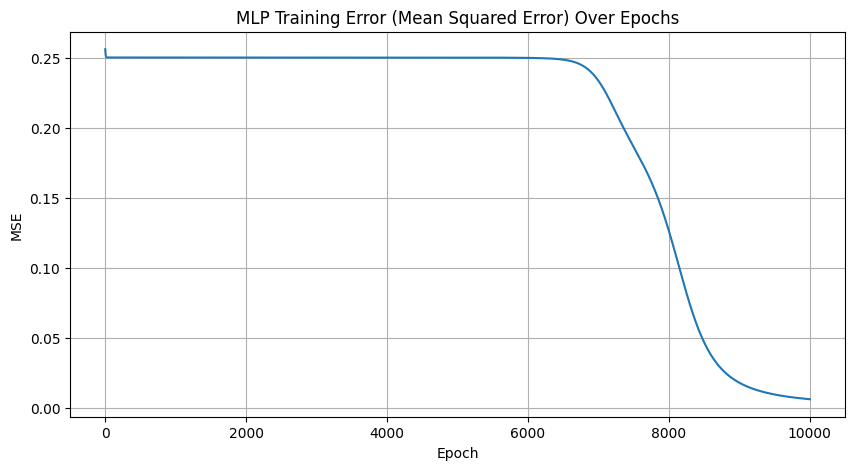

In [ ]:
import numpy as np
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(output):
    return output * (1 - output)
class MLP_Backpropagation:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, max_epochs=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.W_ih = np.random.uniform(low=-0.5, high=0.5, size=(input_size, hidden_size))
        self.b_h = np.zeros((1, hidden_size)) # Bias for hidden layer
        self.W_ho = np.random.uniform(low=-0.5, high=0.5, size=(hidden_size, output_size))
        self.b_o = np.zeros((1, output_size)) # Bias for output layer
        self.errors = [] # To track mean squared erro
    def forward_pass(self, X):
        self.net_h = np.dot(X, self.W_ih) + self.b_h
        self.out_h = sigmoid(self.net_h)
        self.net_o = np.dot(self.out_h, self.W_ho) + self.b_o
        self.out_o = sigmoid(self.net_o)
        return self.out_o
    def backward_pass(self, X, y, out_o, out_h):
        error_o = y - out_o
        d_o = error_o * sigmoid_derivative(out_o)
        error_h = d_o.dot(self.W_ho.T)
        d_h = error_h * sigmoid_derivative(out_h)
        self.W_ho += self.out_h.T.dot(d_o) * self.learning_rate
        self.b_o += np.sum(d_o, axis=0, keepdims=True) * self.learning_rate
        self.W_ih += X.T.dot(d_h) * self.learning_rate
        self.b_h += np.sum(d_h, axis=0, keepdims=True) * self.learning_rate
        return np.mean(error_o**2)
    def train(self, X_train, y_train):
        print(f"--- Training MLP (Hidden Size: {self.hidden_size}, Rate: {self.learning_rate}) ---")
        for epoch in range(self.max_epochs):
            out_o = self.forward_pass(X_train)
            mse = self.backward_pass(X_train, y_train, out_o, self.out_h)
            self.errors.append(mse)
            if (epoch + 1) % 1000 == 0:
                print(f"Epoch {epoch + 1}/{self.max_epochs}, Mean Squared Error: {mse:.6f}")
        print("\n--- Training Complete ---")
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_train = np.array([
    [0],
    [1],
    [1],
    [0]
])
mlp = MLP_Backpropagation(
    input_size=2,
    hidden_size=4,
    output_size=1,
    learning_rate=0.2,
    max_epochs=10000
)
mlp.train(X_train, y_train)
print("\n--- Testing Model Predictions ---")
predictions = mlp.forward_pass(X_train)
for inputs, prediction, expected in zip(X_train, predictions, y_train):
    predicted_class = 1 if prediction[0] >= 0.5 else 0
    status = "Correct" if predicted_class == expected[0] else "Incorrect"
    print(f"Input: {inputs}, Output: {prediction[0]:.4f}, Predicted Class: {predicted_class}, Expected: {expected[0]} ({status})")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(mlp.errors)
plt.title('MLP Training Error (Mean Squared Error) Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

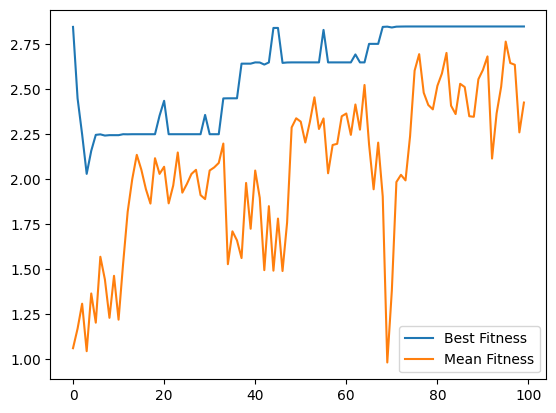

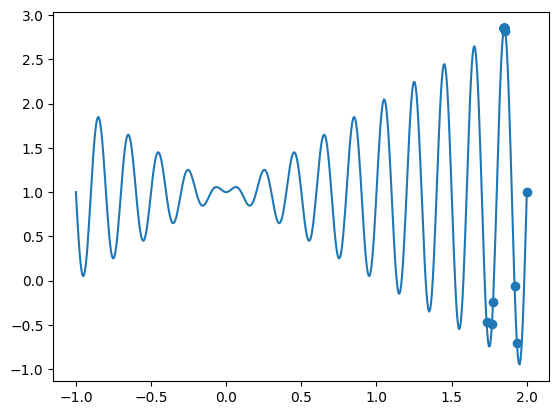

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def fitness_function(x):
    return x * np.sin(10 * np.pi * x) + 1
POP_SIZE = 40
GENERATIONS = 100
X_MIN, X_MAX = -1.0, 2.0
CROSSOVER_PROB = 0.9
MUTATION_PROB = 0.2
MUTATION_STD = 0.1
np.random.seed(42)
population = np.random.uniform(X_MIN, X_MAX, POP_SIZE)
def tournament_selection(pop, fitness, k=3):
    selected = []
    for _ in range(len(pop)):
        idx = np.random.choice(len(pop), k, replace=False)
        selected.append(pop[idx[np.argmax(fitness[idx])]])
    return np.array(selected)
def arithmetic_crossover(p1, p2):
    alpha = np.random.rand()
    return alpha * p1 + (1 - alpha) * p2, alpha * p2 + (1 - alpha) * p1
def mutate(x):
    if np.random.rand() < MUTATION_PROB:
        x += np.random.normal(0, MUTATION_STD)
    return np.clip(x, X_MIN, X_MAX)
best_history = []
mean_history = []
for _ in range(GENERATIONS):
    fitness = fitness_function(population)
    best_history.append(np.max(fitness))
    mean_history.append(np.mean(fitness))
    parents = tournament_selection(population, fitness)
    offspring = []
    np.random.shuffle(parents)
    for i in range(0, POP_SIZE, 2):
        if np.random.rand() < CROSSOVER_PROB:
            c1, c2 = arithmetic_crossover(parents[i], parents[i + 1])
        else:
            c1, c2 = parents[i], parents[i + 1]
        offspring.extend([mutate(c1), mutate(c2)])
    population = np.array(offspring)
x = np.linspace(X_MIN, X_MAX, 500)
plt.figure()
plt.plot(best_history, label="Best Fitness")
plt.plot(mean_history, label="Mean Fitness")
plt.legend()
plt.show()
plt.figure()
plt.plot(x, fitness_function(x))
plt.scatter(population, fitness_function(population))
plt.show()

Actual Output : [0 1 1 0]
Predicted Output : [0.12867011 0.40557607 0.64053468 0.79440003]


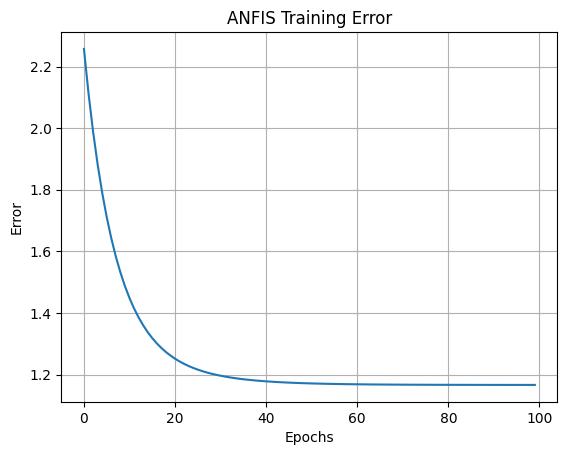

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def gaussmf(x, c, sigma):
    return np.exp(-((x - c) ** 2) / (2 * sigma ** 2))
class ANFIS:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.n = X.shape[0]
        self.c1, self.s1 = 0.0, 1.0
        self.c2, self.s2 = 1.0, 1.0
        self.p = np.random.rand(2)
        self.q = np.random.rand(2)
        self.r = np.random.rand(2)
        self.errors = []
    def train(self, epochs=100, lr=0.01):
        for _ in range(epochs):
            error_sum = 0
            for i in range(self.n):
                x1, x2 = self.X[i]
                y = self.Y[i]
                mu1 = gaussmf(x1, self.c1, self.s1)
                mu2 = gaussmf(x2, self.c2, self.s2)
                w1, w2 = mu1, mu2
                w1n = w1 / (w1 + w2)
                w2n = w2 / (w1 + w2)
                f1 = self.p[0]*x1 + self.q[0]*x2 + self.r[0]
                f2 = self.p[1]*x1 + self.q[1]*x2 + self.r[1]
                y_pred = w1n*f1 + w2n*f2
                error = y - y_pred
                error_sum += error**2
                self.p += lr * error
                self.q += lr * error
                self.r += lr * error
            self.errors.append(error_sum)
    def predict(self, X):
        out = []
        for x1, x2 in X:
            mu1 = gaussmf(x1, self.c1, self.s1)
            mu2 = gaussmf(x2, self.c2, self.s2)
            w1n = mu1 / (mu1 + mu2)
            w2n = mu2 / (mu1 + mu2)
            f1 = self.p[0]*x1 + self.q[0]*x2 + self.r[0]
            f2 = self.p[1]*x1 + self.q[1]*x2 + self.r[1]
            out.append(w1n*f1 + w2n*f2)
        return np.array(out)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y = np.array([0, 1, 1, 0])
model = ANFIS(X, Y)
model.train(epochs=100, lr=0.01)
print("Actual Output :", Y)
print("Predicted Output :", model.predict(X))
plt.plot(model.errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("ANFIS Training Error")
plt.grid()
plt.show()